# Volume-Weighted Moving Average (VWMA) 

https://www.tradingsetupsreview.com/volume-weighted-moving-average-vwma/

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

# fix_yahoo_finance is used to fetch data 
import fix_yahoo_finance as yf
yf.pdr_override()

In [2]:
# input
symbol = 'AAPL'
start = '2018-12-01'
end = '2019-02-01'

# Read data 
df = yf.download(symbol,start,end)

# View Columns
df.head()

[*********************100%***********************]  1 of 1 downloaded


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-12-03,184.460007,184.940002,181.210007,184.820007,184.030731,40802500
2018-12-04,180.949997,182.389999,176.270004,176.690002,175.935455,41344300
2018-12-06,171.759995,174.779999,170.419998,174.720001,173.973862,43098400
2018-12-07,173.490005,174.490005,168.300003,168.490005,167.770477,42281600
2018-12-10,165.000000,170.089996,163.330002,169.600006,168.875732,62026000


In [3]:
import talib as ta

In [4]:
df['SMA'] = ta.SMA(df['Adj Close'], timeperiod=3)

In [5]:
df['VWMA'] = ((df['Adj Close']*df['Volume'])+(df['Adj Close'].shift(1)*df['Volume'].shift(1))+(df['Adj Close'].shift(2)*df['Volume'].shift(2))) / (df['Volume'].rolling(3).sum())
df.head()

,Open,High,Low,Close,Adj Close,Volume,SMA,VWMA
Date,,,,,,,,
2018-12-03,184.460007,184.940002,181.210007,184.820007,184.030731,40802500,NaN,NaN
2018-12-04,180.949997,182.389999,176.270004,176.690002,175.935455,41344300,NaN,NaN
2018-12-06,171.759995,174.779999,170.419998,174.720001,173.973862,43098400,177.980016,177.897734
2018-12-07,173.490005,174.490005,168.300003,168.490005,167.770477,42281600,172.559931,172.544078
2018-12-10,165.000000,170.089996,163.330002,169.600006,168.875732,62026000,170.206690,170.049289


In [8]:
def VWMA(close,volume, n):
    cv =pd.Series(close.shift(n) * volume.shift(n))
    tv = volume.rolling(n).sum()
    vwma = cv/tv
    return vwma

VWMA(df['Adj Close'],df['Volume'], 3)

Date
2018-12-03          NaN
2018-12-04          NaN
2018-12-06          NaN
2018-12-07    59.253939
2018-12-10    49.346215
2018-12-11    49.462562
2018-12-12    48.943213
2018-12-13    91.236553
2018-12-14    73.353635
2018-12-17    51.320951
2018-12-18    45.692473
2018-12-19    52.736732
2018-12-20    48.960207
2018-12-21    26.703221
2018-12-24    39.747323
2018-12-26    52.820701
2018-12-27    96.527635
2018-12-28    35.289384
2018-12-31    70.300981
2019-01-02    72.233727
2019-01-03    40.273964
2019-01-04    29.406837
2019-01-07    28.453408
2019-01-08    83.726561
2019-01-09    61.404161
2019-01-10    66.188165
2019-01-11    57.071189
2019-01-14    72.284671
2019-01-15    62.145469
2019-01-16    44.677247
2019-01-17    54.377130
2019-01-18    46.483125
2019-01-22    50.190839
2019-01-23    53.028374
2019-01-24    66.740402
2019-01-25    56.505153
2019-01-28    41.623755
2019-01-29    38.181259
2019-01-30    40.872092
2019-01-31    28.419125
2019-02-01    47.616386
dtype: floa

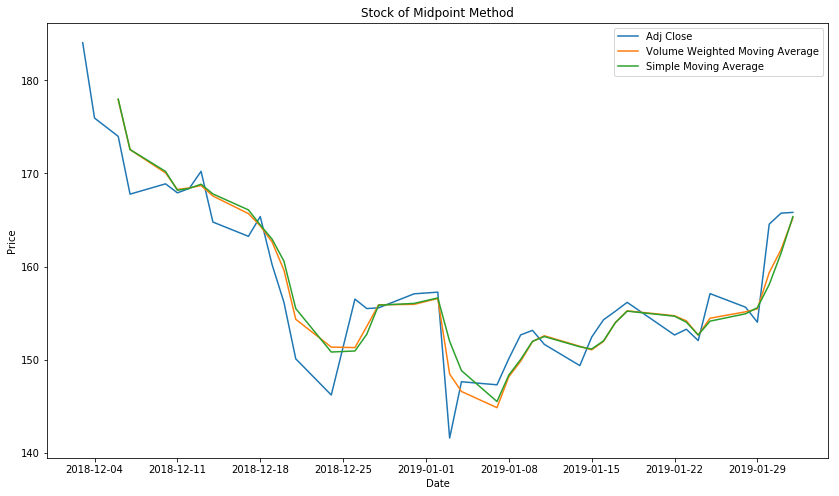

In [37]:
plt.figure(figsize=(14,8))
plt.plot(df['Adj Close'])
plt.plot(df['VWMA'], label='Volume Weighted Moving Average')
plt.plot(df['SMA'], label='Simple Moving Average')
plt.legend(loc='best')
plt.title('Stock of Midpoint Method')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

## Candlestick with VWMA

In [38]:
from matplotlib import dates as mdates
import datetime as dt

dfc = df.copy()
dfc['VolumePositive'] = dfc['Open'] < dfc['Adj Close']
#dfc = dfc.dropna()
dfc = dfc.reset_index()
dfc['Date'] = mdates.date2num(dfc['Date'].astype(dt.date))
dfc.head()

,Date,Open,High,Low,Close,Adj Close,Volume,VWMA,SMA,VolumePositive
0,737031.0,184.460007,184.940002,181.210007,184.820007,184.030731,40802500,NaN,NaN,False
1,737032.0,180.949997,182.389999,176.270004,176.690002,175.935455,41344300,NaN,NaN,False
2,737034.0,171.759995,174.779999,170.419998,174.720001,173.973862,43098400,177.897734,177.980016,True
3,737035.0,173.490005,174.490005,168.300003,168.490005,167.770477,42281600,172.544078,172.559931,False
4,737038.0,165.000000,170.089996,163.330002,169.600006,168.875732,62026000,170.049289,170.206690,True


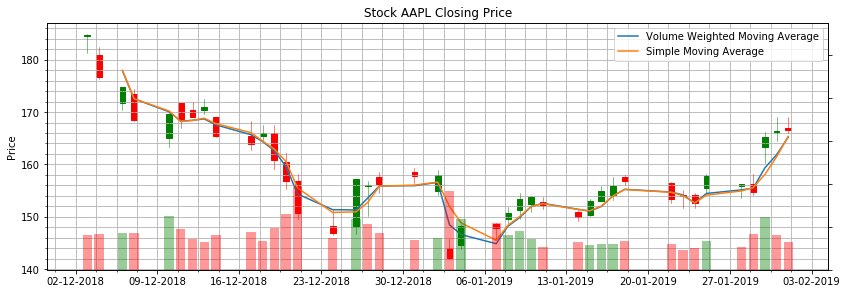

In [40]:
from mpl_finance import candlestick_ohlc

fig = plt.figure(figsize=(14,10))
ax1 = plt.subplot(2, 1, 1)
candlestick_ohlc(ax1,dfc.values, width=0.5, colorup='g', colordown='r', alpha=1.0)
ax1.plot(df['VWMA'], label='Volume Weighted Moving Average')
ax1.plot(df['SMA'], label='Simple Moving Average')
ax1.set_title('Stock '+ symbol +' Closing Price')
ax1.set_ylabel('Price')
ax1.xaxis_date()
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
ax1.grid(True, which='both')
ax1.minorticks_on()
ax1v = ax1.twinx()
colors = dfc.VolumePositive.map({True: 'g', False: 'r'})
ax1v.bar(dfc.Date, dfc['Volume'], color=colors, alpha=0.4)
ax1v.axes.yaxis.set_ticklabels([])
ax1v.set_ylim(0, 3*df.Volume.max())
ax1.set_title('Stock '+ symbol +' Closing Price')
ax1.set_ylabel('Price')
ax1.legend(loc='best')